# Data Preparation and cleaning

1. Loaded the file using Pandas. 
2. Look at basic information about the data, columns, value_counts of various columns etc.
3. Converted some 'object' type columns having few unique values to categorical data type(for memory efficiency, as my laptop was lagging).
4. All these were done in a different notebook, then converted to a pickle file to preserve categorical data.

### All libraries imported below for quick access later

In [4]:
import pandas as pd
df = pd.read_pickle('processed_df.pkl')

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

### Memory usage after processing the file (processing done in a separate notebook)

In [6]:
df.info(memory_usage = 'deep') #Memory usage before processing was 9.3gigs, which made my laptop lag


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   ID                     object  
 1   Source                 category
 2   Severity               int64   
 3   Start_Time             object  
 4   End_Time               object  
 5   Start_Lat              float64 
 6   Start_Lng              float64 
 7   End_Lat                float64 
 8   End_Lng                float64 
 9   Distance(mi)           float64 
 10  Description            object  
 11  Street                 object  
 12  City                   object  
 13  County                 object  
 14  State                  category
 15  Zipcode                object  
 16  Country                category
 17  Timezone               category
 18  Airport_Code           object  
 19  Weather_Timestamp      object  
 20  Temperature(F)         float64 
 21  Wind_Chill(F)          float64 

### Missing rows and graph(Not explored further in this notebook)

In [7]:
#missing rows
missing_percentage = df.isna().sum().sort_values(ascending=False)*100/len(df) #empty rows by total rows, sum() shows the sum columnwise
missing_percentage

End_Lng                  44.029355
End_Lat                  44.029355
Precipitation(in)        28.512858
Wind_Chill(F)            25.865904
Wind_Speed(mph)           7.391355
Visibility(mi)            2.291524
Wind_Direction            2.267043
Humidity(%)               2.253301
Weather_Condition         2.244438
Temperature(F)            2.120143
Pressure(in)              1.820288
Weather_Timestamp         1.555666
Sunrise_Sunset            0.300787
Civil_Twilight            0.300787
Astronomical_Twilight     0.300787
Nautical_Twilight         0.300787
Airport_Code              0.292881
Street                    0.140637
Timezone                  0.101030
Zipcode                   0.024779
City                      0.003274
Description               0.000065
ID                        0.000000
Distance(mi)              0.000000
Start_Lng                 0.000000
Source                    0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time            

In [8]:
missing_percentage[missing_percentage!=0]

End_Lng                  44.029355
End_Lat                  44.029355
Precipitation(in)        28.512858
Wind_Chill(F)            25.865904
Wind_Speed(mph)           7.391355
Visibility(mi)            2.291524
Wind_Direction            2.267043
Humidity(%)               2.253301
Weather_Condition         2.244438
Temperature(F)            2.120143
Pressure(in)              1.820288
Weather_Timestamp         1.555666
Sunrise_Sunset            0.300787
Civil_Twilight            0.300787
Astronomical_Twilight     0.300787
Nautical_Twilight         0.300787
Airport_Code              0.292881
Street                    0.140637
Timezone                  0.101030
Zipcode                   0.024779
City                      0.003274
Description               0.000065
dtype: float64

<Axes: >

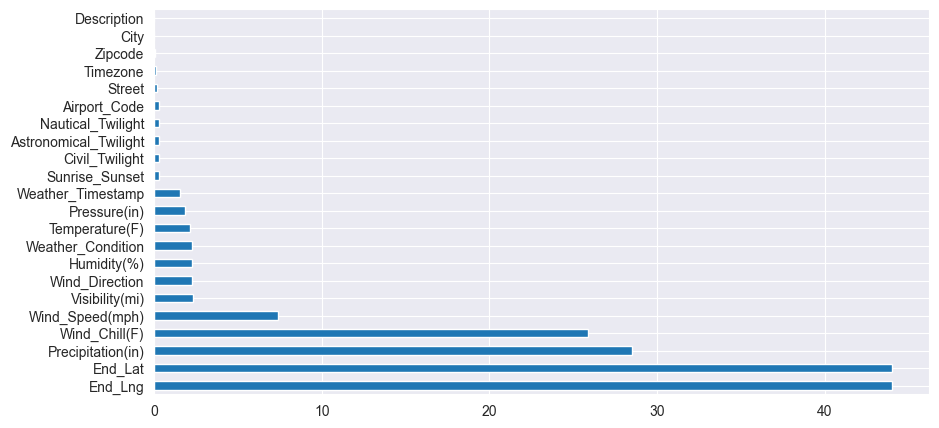

In [9]:

plt.figure(figsize=(10,5))
missing_percentage[missing_percentage!=0].plot(kind="barh")

This Graph represents the percentage of missing rows, and by looking at it, specifically the huge number of missing coordinates, we can infer that 

# Ask and Answer Questions

Questions that came into my mind while taking a look at the data(updated gradually during the process, not like all questions came into my mind at once)

   1. Are there more accidents in warmer or colder areas?
   2. Which 5 states have the highest number of accidents?
      Exclusively check per capita (its not fair to compare two disproportionately populated states)
   3. Among the top 100 cities, which state do most of them belong to? Or maybe statewise numbers of top 100 cities.
   4. What time of the day are accidents most frequent in?
   5. Which days have the most accidents?
   6. Which months have the most accidents?
   7. What is the trend of accidents over the year?
   8. How safe is a particular state?(accident trend in one state)
   

# EXPLORATORY ANALYSIS AND VISUALISATION

Columns we'll analyze:
1. City
2. Start Time
3. Start_Lng, Start_Lat
4. Source
5. Weather
6. Temperature



### City

In [10]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [11]:
len(df.City.unique()) #no.of unique cities

13679

In [12]:
df.nunique().sort_values(ascending=True) #number of unique values in each column

Country                        1
Turning_Loop                   1
Amenity                        2
Bump                           2
Civil_Twilight                 2
Sunrise_Sunset                 2
Traffic_Signal                 2
Crossing                       2
Railway                        2
Stop                           2
Station                        2
Roundabout                     2
Junction                       2
No_Exit                        2
Give_Way                       2
Traffic_Calming                2
Astronomical_Twilight          2
Nautical_Twilight              2
Source                         3
Severity                       4
Timezone                       4
Wind_Direction                24
State                         49
Visibility(mi)                92
Humidity(%)                  100
Weather_Condition            144
Wind_Speed(mph)              184
Precipitation(in)            299
Temperature(F)               860
Wind_Chill(F)               1001
Pressure(i

In [13]:
#lets check the cities with accident counts, which is, count of each city
cities_by_accidents = df.City.value_counts()
cities_by_accidents

City
Miami          186917
Houston        169609
Los Angeles    156491
Charlotte      138652
Dallas         130939
                ...  
Saint Croix         1
Masardis            1
Okaton              1
Wasta               1
Adell               1
Name: count, Length: 13678, dtype: int64

<Axes: ylabel='City'>

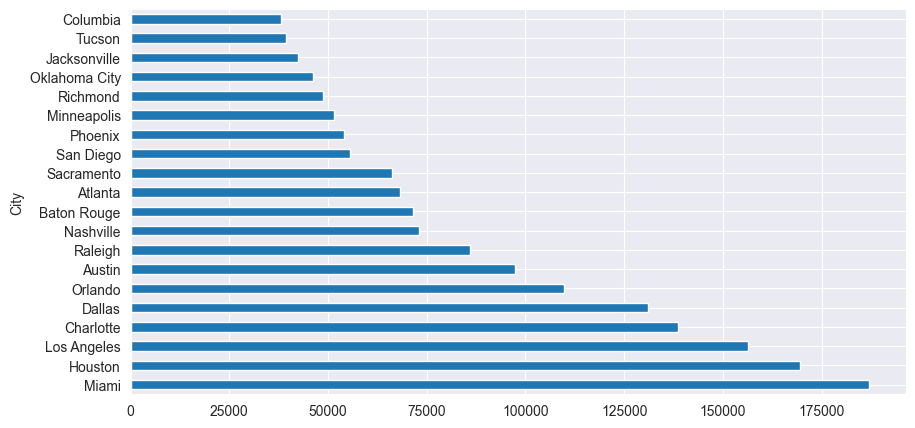

In [14]:
#lets plot the top 20 cities with accidents
plt.figure(figsize=(10,5))
cities_by_accidents[:20].plot(kind="barh")

In [15]:
#but from some external source, I got to know that New York is the City with the largest population, why then its not in top 20?
'New York' in df.City

False

So we got to know that there is no data for New York, such kind of insight is important before any presentation or meeting, so you don't 
feel awkward during the meeting


Text(0, 0.5, 'Cities_count')

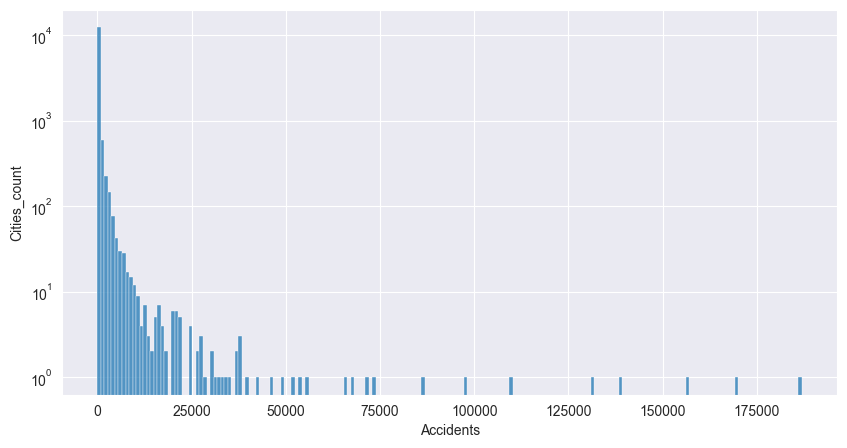

In [ ]:
#Lets get insights on the distribution of accidents among cities
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(10,5))
sns.histplot(cities_by_accidents, bins=200, log=True)#as the data is skewed, we will use log scale to get a better view
plt.xlabel('Accidents')
plt.ylabel('Cities_count')

Text(0, 0.5, 'No.of Cities')

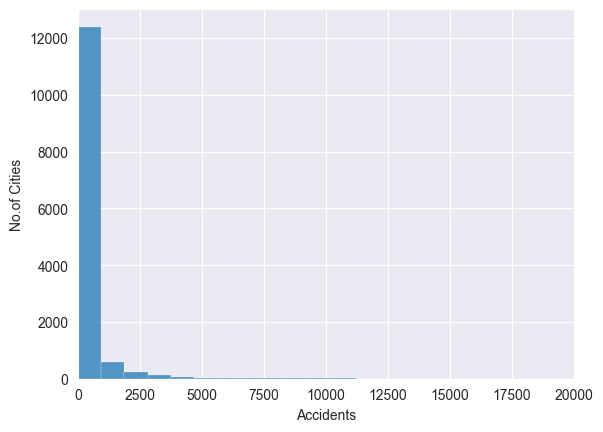

In [50]:
sns.histplot(cities_by_accidents, bins=200)
plt.xlim(0,20000) # to further look into the distribution on the dominant side
plt.xlabel("Accidents")
plt.ylabel("No.of Cities")


With this histogram, we can deduce that most of the cities had less than 2k accidents, while cities with high number of accidents are really less, as demonstrated in the data before(value_counts)


In [51]:
#lets calculate the percentage of cities with high number of accidents and low ones
high = cities_by_accidents[cities_by_accidents>2000]
len(high)


649

In [18]:
low = cities_by_accidents[cities_by_accidents<=2000]
len(low)


13029

In [19]:
perc_low_accident_cities = len(low)*100/len(cities_by_accidents)
perc_low_accident_cities

95.25515426231905

In [20]:
perc_high_accident_cities = len(high)*100/len(cities_by_accidents)
perc_high_accident_cities

4.744845737680947

Text(0, 0.5, 'Cities_count')

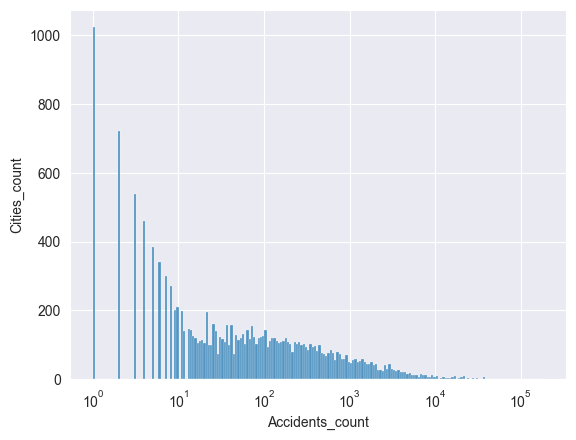

In [52]:
#Now as the graphs are exponentially decreasing, we can plot them on a logarithmic scale to get a better idea
sns.histplot(cities_by_accidents,bins=200, log_scale=True)
plt.xlabel('Accidents_count')
plt.ylabel("Cities_count")

 now we see that a major chunk of the graph is in the range 10^0 - 10^3
 this means that a lot of cities had 10-1000 accidents
 also, almost 1000 cities reported only 1 accident


In [22]:
#lets confirm the 1 accident cities, 
cities_by_accidents[cities_by_accidents==1] 

City
American Fork-Pleasant Grove    1
Berlin township                 1
District 1 Abingdon             1
Selby                           1
Smackover                       1
                               ..
Saint Croix                     1
Masardis                        1
Okaton                          1
Wasta                           1
Adell                           1
Name: count, Length: 1023, dtype: int64

### Start_Time

In [23]:
df.Start_Time 

0          2016-02-08 05:46:00
1          2016-02-08 06:07:59
2          2016-02-08 06:49:27
3          2016-02-08 07:23:34
4          2016-02-08 07:39:07
                  ...         
7728389    2019-08-23 18:03:25
7728390    2019-08-23 19:11:30
7728391    2019-08-23 19:00:21
7728392    2019-08-23 19:00:21
7728393    2019-08-23 18:52:06
Name: Start_Time, Length: 7728394, dtype: object

In [24]:
df.Start_Time[0]#Its a string, lets convert this to date_time type for easy work


'2016-02-08 05:46:00'

In [25]:
df.Start_Time=pd.to_datetime(df.Start_Time, format='mixed') # mixed format to account for a time having seconds value in fractions

In [26]:
df.Start_Time[0] #doneee

Timestamp('2016-02-08 05:46:00')

We can't really plot the accidents with time, cuz there are many unique values, so we can convert the times to hour of the day, for better understanding

In [27]:
df.Start_Time[0].hour #This is the 5th hour

5

<Axes: xlabel='Start_Time', ylabel='Count'>

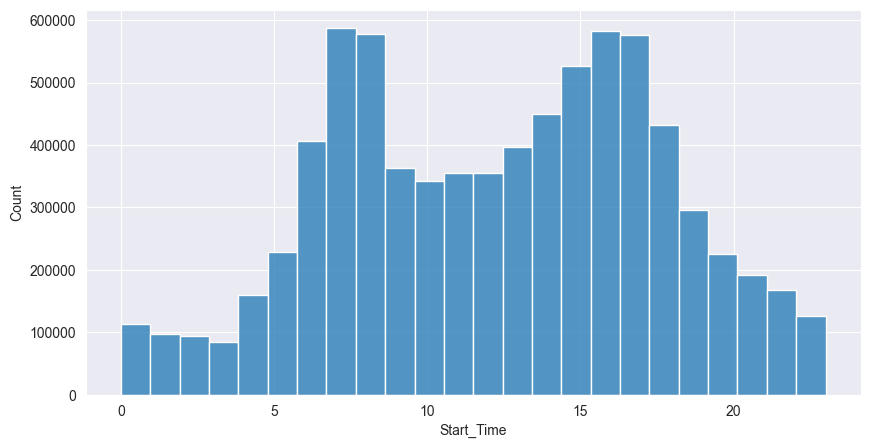

In [53]:
#converting whole start_time column values to hour of the day and plotting
plt.figure(figsize=(10,5))
sns.histplot(df.Start_Time.dt.hour,bins=24)#24 bins since there are 24 hours in a day

Inferences:
--Most accidents happen between 6am to 10am, probably becz of people leaving for work and in a hurry
-- Next highest percentage of accidents is between 3pm to 7pm in the evening

<Axes: xlabel='Start_Time', ylabel='Count'>

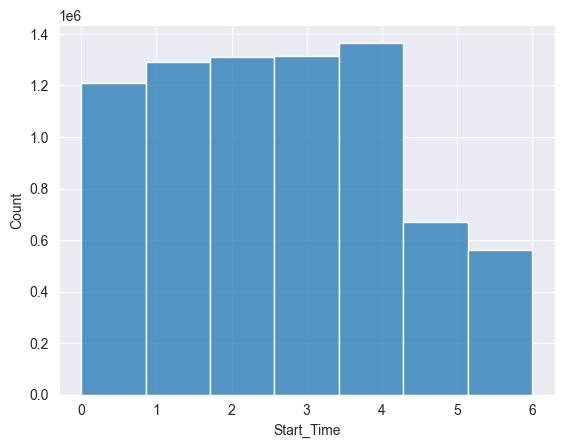

In [29]:
# lets analyse accidents on a daily basis
sns.histplot(df.Start_Time.dt.dayofweek,bins=7)

--Accidents happen on weekdays, and are relatively low on weekends, maybe bacause most people are home 

Question - Is the distribution of accidents by hour, the same on weekends as on weekdays

(This is to test our hypothesis that in certain hours accidents are high cuz of people going to work, if on weekends there is a similar trend where accidents high time is the same as on weekdays, our hypothesis will be proved wrong, otherwise we will be fairly correct)

In [30]:
sundays = df.Start_Time[df.Start_Time.dt.day_of_week==6] # This converts time to days of week,
sundays                                                  # THen we select rows where value is 6(Sunday)



135       2016-02-14 10:13:00
136       2016-02-14 10:49:23
137       2016-02-14 10:41:57
138       2016-02-14 18:15:23
139       2016-02-14 19:17:01
                  ...        
7726136   2019-08-18 22:48:14
7726137   2019-08-18 23:24:10
7726252   2019-08-18 22:56:56
7726253   2019-08-18 22:56:56
7726292   2019-08-18 22:54:41
Name: Start_Time, Length: 562744, dtype: datetime64[ns]

<Axes: xlabel='Start_Time', ylabel='Count'>

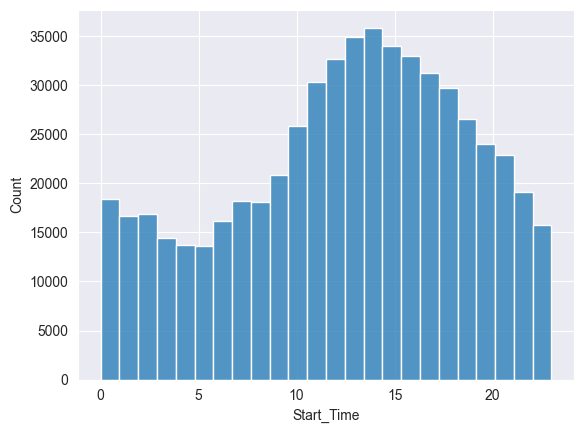

In [31]:
#plotting the distribution of accidents on sundays
sns.histplot(sundays.dt.hour,bins=24)

##This brings an important insight, our hypothesis was correct, plus, there are more accidents during noon and evening, 
giving rise to another and probably correct hypothesis: Accidents follow this trend on weekends because people go out on weekends during the aforementioned time period. 

<Axes: xlabel='Start_Time', ylabel='Count'>

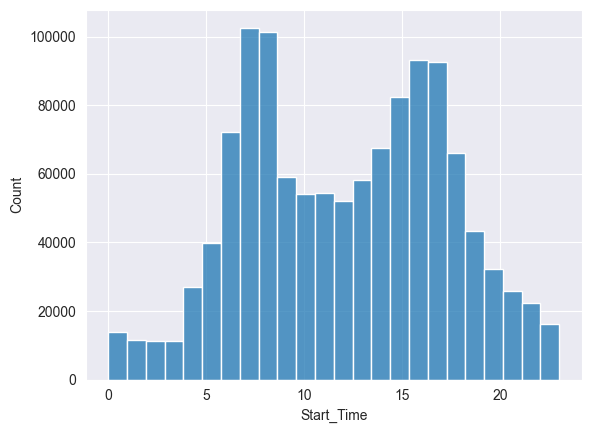

In [32]:
#lets look at data from mondays just to be sure
mondays = df.Start_Time[df.Start_Time.dt.dayofweek==0]
sns.histplot(mondays.dt.hour, bins=24)

Yes here its clear that accidents during weekdays happen during commute hours for work, and accidents on weekends happen due to people going out during noon and early evening for leisure or anything.


<Axes: xlabel='Start_Time', ylabel='Count'>

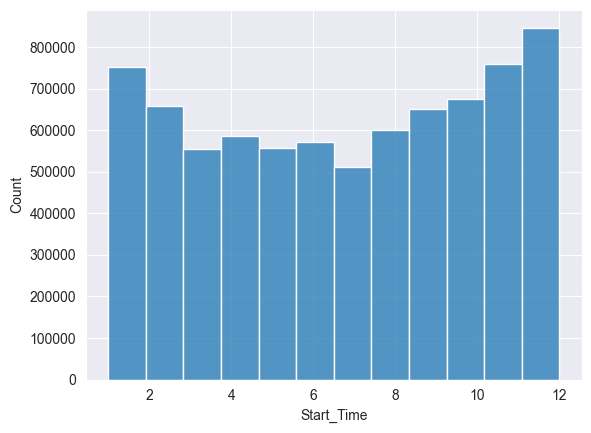

In [33]:
# lets analyse accidents on a daily basis
sns.histplot(df.Start_Time.dt.month,bins=12)

This presents some important information , Accidents are low around the summer and are higher in winters, maybe because there is low visibility on roads during winters.

<Axes: xlabel='Start_Time', ylabel='Count'>

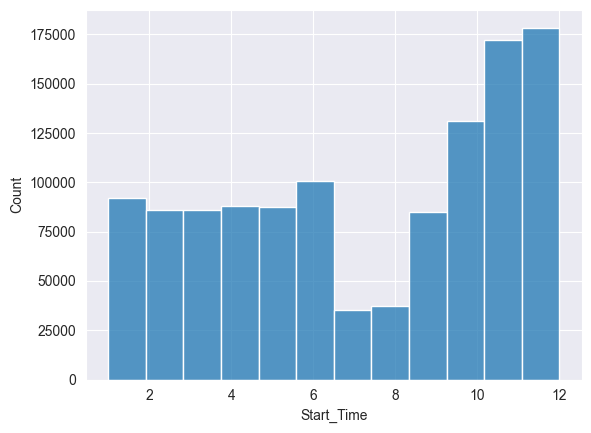

In [34]:
#lets look at data for a particular year
df_2020 = df.Start_Time[df.Start_Time.dt.year == 2020]
sns.histplot(df_2020.dt.month,bins=12)


### Sourcewise distribution of accidents


In [35]:
df.Source

0          Source2
1          Source2
2          Source2
3          Source2
4          Source2
            ...   
7728389    Source1
7728390    Source1
7728391    Source1
7728392    Source1
7728393    Source1
Name: Source, Length: 7728394, dtype: category
Categories (3, object): ['Source1', 'Source2', 'Source3']

<Axes: xlabel='Start_Time', ylabel='Count'>

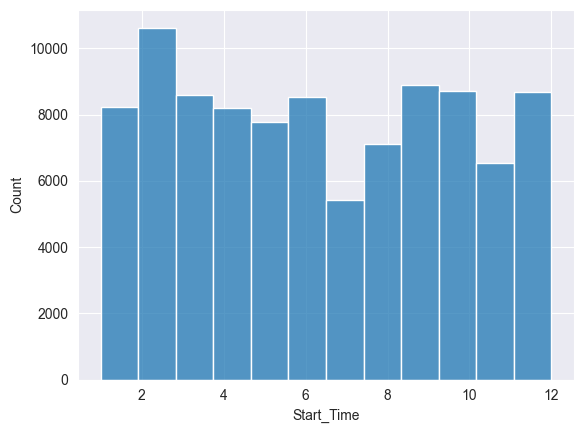

In [36]:
source_df = df[df.Source == 'Source3']  

sns.histplot(source_df.Start_Time.dt.month, bins = 12)


<Axes: xlabel='Start_Time', ylabel='Count'>

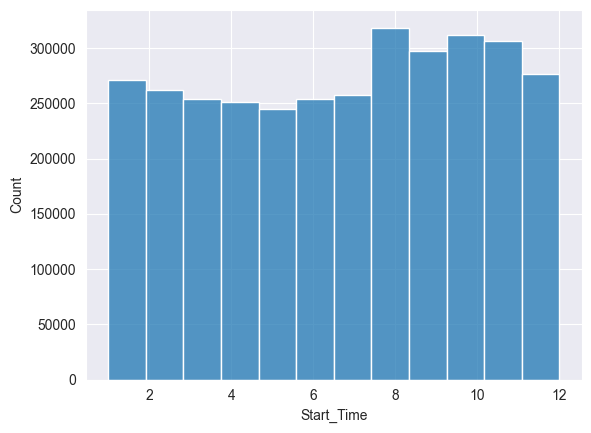

In [37]:
source_df = df[df.Source == 'Source2']  

sns.histplot(source_df.Start_Time.dt.month, bins = 12)


<Axes: xlabel='Start_Time', ylabel='Count'>

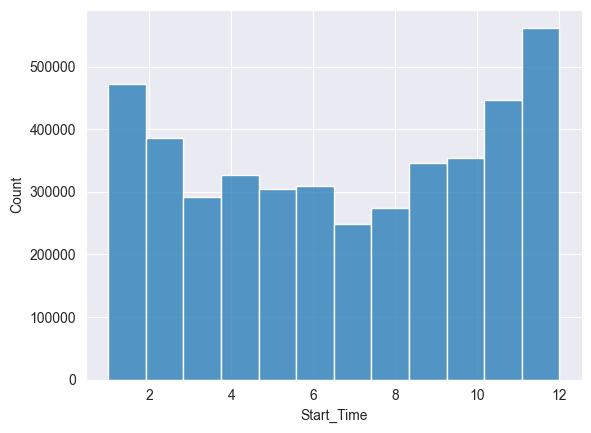

In [38]:
source_df = df[df.Source == 'Source1']  

sns.histplot(source_df.Start_Time.dt.month, bins = 12)


<Axes: ylabel='count'>

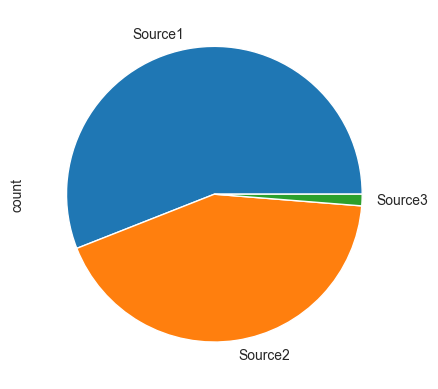

In [39]:
df.Source.value_counts().plot(kind = 'pie')

Most of the data is from source 1 and 2, while Source 3 contributes almost negligible amount in our data. 

### Latitude and longitude of accidents

In [40]:
df.Start_Lat

0          39.865147
1          39.928059
2          39.063148
3          39.747753
4          39.627781
             ...    
7728389    34.002480
7728390    32.766960
7728391    33.775450
7728392    33.992460
7728393    34.133930
Name: Start_Lat, Length: 7728394, dtype: float64

In [41]:
df.Start_Lng

0          -84.058723
1          -82.831184
2          -84.032608
3          -84.205582
4          -84.188354
              ...    
7728389   -117.379360
7728390   -117.148060
7728391   -117.847790
7728392   -118.403020
7728393   -117.230920
Name: Start_Lng, Length: 7728394, dtype: float64

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

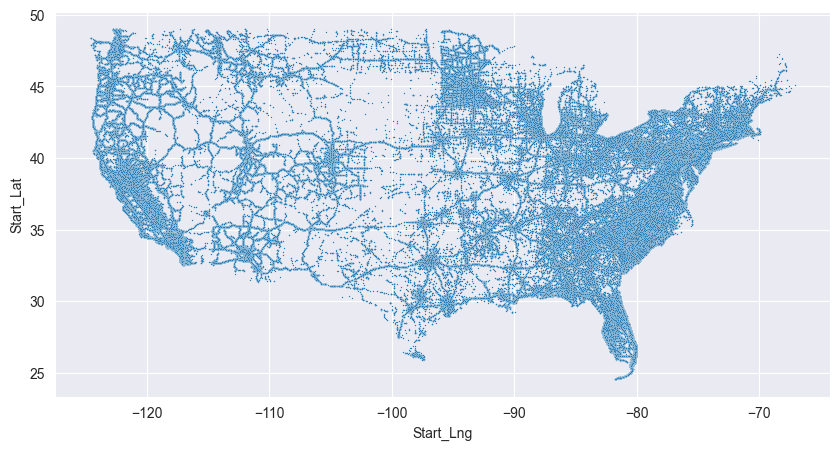

In [42]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df.Start_Lng,y=df.Start_Lat, s=1) #as lat changes, we move top to bottom, and move left to right for long change
#thats why we plotted longitude on x axis and latitudes on y axis.

In [43]:
# lets create a sample data with 1000 data points
sample_df = df.sample(n=50000)
#get their latlong pairs
pairs = list(zip(list(sample_df.Start_Lat),list(sample_df.Start_Lng)))


In [44]:
lat,lng = (df.Start_Lat[0], df.Start_Lng[0])

map = folium.Map()
HeatMap(pairs).add_to(map)

map

### Weather analysis

In [74]:
# Top 10 most common weather conditions during accidents
top_weather = df.Weather_Condition.value_counts().head(10)
top_weather


Weather_Condition
Fair                2560802
Mostly Cloudy       1016195
Cloudy               817082
Clear                808743
Partly Cloudy        698972
Overcast             382866
Light Rain           352957
Scattered Clouds     204829
Light Snow           128680
Fog                   99238
Name: count, dtype: int64

Text(0, 0.5, 'Weather Condition')

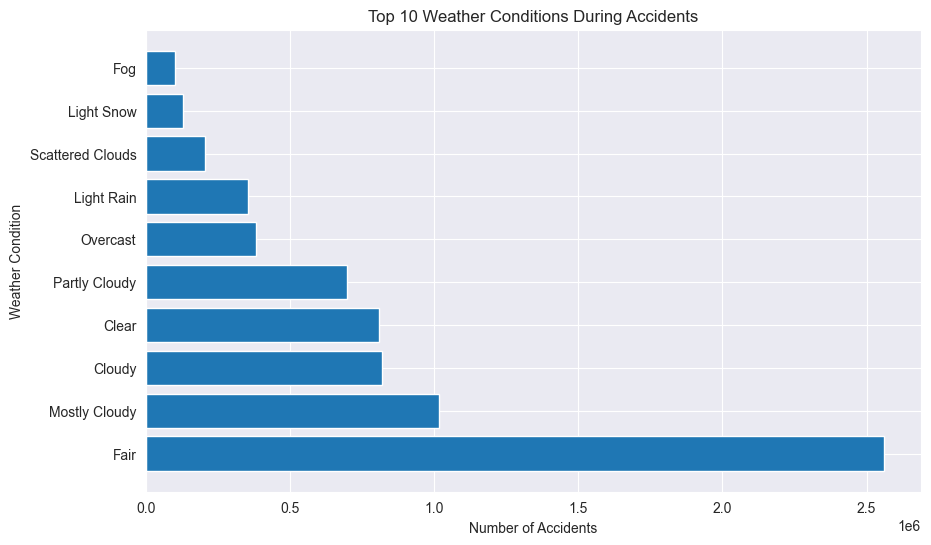

In [76]:
plt.figure(figsize=(10, 6))
plt.barh(top_weather.index, top_weather.values)
plt.title('Top 10 Weather Conditions During Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')

C:\Users\ammar\AppData\Local\Temp\ipykernel_18568\506133095.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  severity_weather = df[df['Weather_Condition'].isin(top_weather)].groupby('Weather_Condition')['Severity'].mean().sort_values()


Text(0, 0.5, 'Weather Condition')

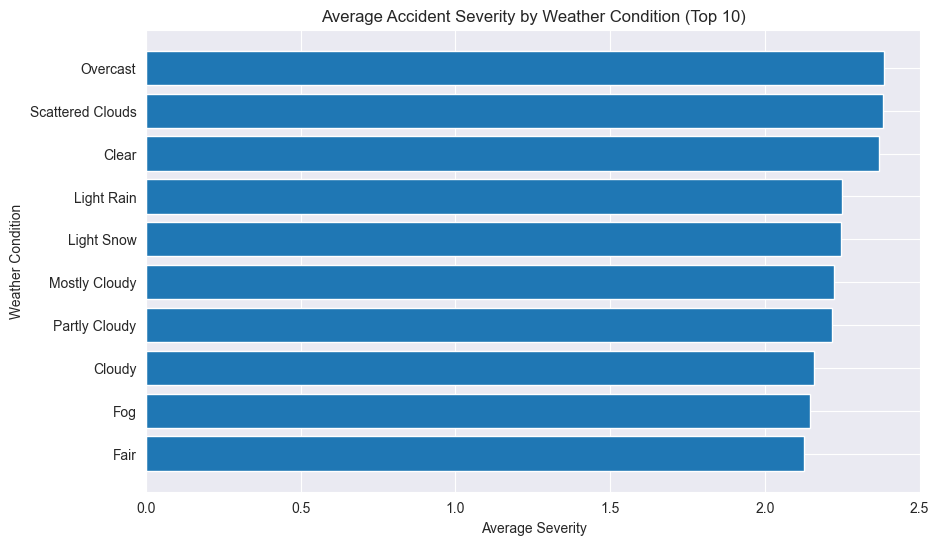

In [80]:
top_weather = df['Weather_Condition'].value_counts().head(10).index
severity_weather = df[df['Weather_Condition'].isin(top_weather)].groupby('Weather_Condition')['Severity'].mean().sort_values()

plt.figure(figsize=(10, 6))
plt.barh(severity_weather.index, severity_weather.values)
plt.title('Average Accident Severity by Weather Condition (Top 10)')
plt.xlabel('Average Severity')
plt.ylabel('Weather Condition')

### Temperature analysis

Text(0, 0.5, 'Number of Accidents')

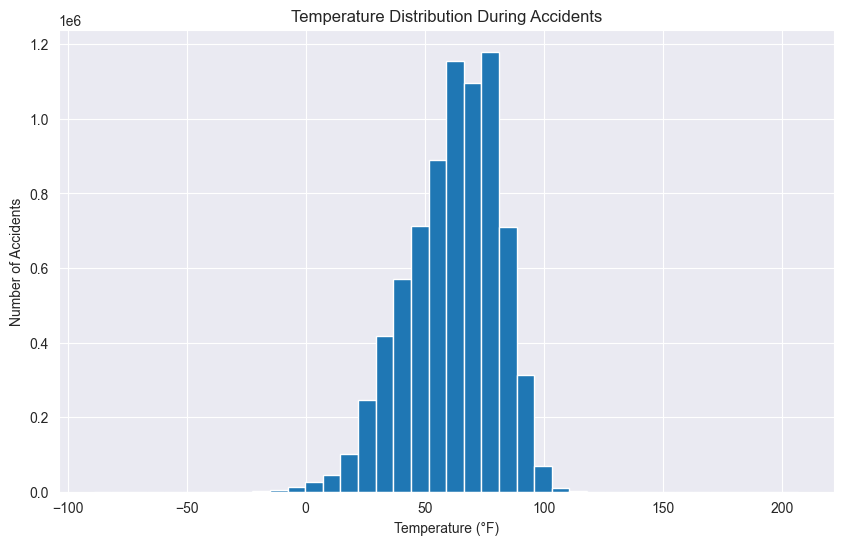

In [71]:
plt.figure(figsize=(10, 6))
plt.hist(df['Temperature(F)'].dropna(), bins=40)
plt.title('Temperature Distribution During Accidents')
plt.xlabel('Temperature (°F)')
plt.ylabel('Number of Accidents')


# Insights/Conclusions
1. There is no data for New York, the most populated city in USA
2. The trend in no.of accidents per cities follows an exponential decay, so log scale is better for visualisation
3. There are almost only 5% cities where accidents are high(>2000), Miami being the number one out of them (1.8lakh accidents)
4. There are almost 95% cities where accidents are low(<2000)
5. Over 1000 cities have reported just 1 accident
6. More insights listed below the respective subheadings